In [1]:
import pandas as pd

In [2]:
ls #see documents in folder

salesData.ipynb  salesrecord.csv


In [3]:
#reading in data from csv

sales = pd.read_csv('salesrecord.csv')

sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
sales.shape

(100, 14)

In [5]:
#display all rows

pd.set_option('display.max_row',None)

In [6]:
#finding nan values

nandf = sales[sales.isna().any(axis=1)]
nandf

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit


In [7]:
#getting rid of space in columns so it will be easier to call
sales.columns = sales.columns.str.replace(' ', '_')
sales.head()

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [8]:
#getting rid of all text in date column
sales = sales[sales['Order_Date'].str[0:2]!='Or']

In [9]:
#make all numerical values correct
sales['Unit Cost'] = pd.to_numeric(sales['Unit_Cost'])
sales['Total Profit'] = pd.to_numeric(sales['Total_Profit'])
sales['Total Cost'] = pd.to_numeric(sales['Total_Cost'])
sales['Unit Price'] = pd.to_numeric(sales['Unit_Price'])
sales['Units Sold'] = pd.to_numeric(sales['Units_Sold'])
sales['Total Revenue'] = pd.to_numeric(sales['Total_Revenue'])

In [10]:
#creating month columns by cutting the months out from order date

sales['Months'] = pd.DatetimeIndex(sales.Order_Date).month

In [11]:
sales.head()

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_Price,...,Total_Revenue,Total_Cost,Total_Profit,Unit Cost,Total Profit,Total Cost,Unit Price,Units Sold,Total Revenue,Months
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,...,2533654.00,1582243.50,951410.50,159.42,951410.50,1582243.50,255.28,9925,2533654.00,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,...,576782.80,328376.44,248406.36,117.11,248406.36,328376.44,205.70,2804,576782.80,8
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,...,1158502.59,933903.84,224598.75,524.96,224598.75,933903.84,651.21,1779,1158502.59,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,...,75591.66,56065.84,19525.82,6.92,19525.82,56065.84,9.33,8102,75591.66,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,...,3296425.02,2657347.52,639077.50,524.96,639077.50,2657347.52,651.21,5062,3296425.02,2


In [12]:
#looking at the categories of regions

from collections import Counter

In [13]:
Counter(sales.Region)

Counter({'Australia and Oceania': 11,
         'Central America and the Caribbean': 7,
         'Europe': 22,
         'Sub-Saharan Africa': 36,
         'Asia': 11,
         'Middle East and North Africa': 10,
         'North America': 3})

In [14]:
#Months with most sales.. we find  (unit price * unit sold)

sales['Sale'] = sales.Units_Sold.astype('int') * sales['Unit_Price'].astype('float')

In [15]:
#finding the country with most purchase

In [16]:
#grouping by country

by_country = sales.groupby(['Country']).sum()

In [17]:
by_country.head()

,Order_ID,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit,Unit Cost,Total Profit,Total Cost,Unit Price,Units Sold,Total Revenue,Months,Sale
Country,,,,,,,,,,,,,,,
Albania,385383069,2269,109.28,35.84,247956.32,81320.96,166635.36,35.84,166635.36,81320.96,109.28,2269,247956.32,2,247956.32
Angola,135425221,4187,668.27,502.54,2798046.49,2104134.98,693911.51,502.54,693911.51,2104134.98,668.27,4187,2798046.49,4,2798046.49
Australia,849569283,12995,904.36,673.86,2489933.49,1913328.37,576605.12,673.86,576605.12,1913328.37,904.36,12995,2489933.49,23,2489933.49
Austria,868214595,2847,437.20,263.33,1244708.40,749700.51,495007.89,263.33,495007.89,749700.51,437.20,2847,1244708.40,2,1244708.40
Azerbaijan,805723690,9255,1088.41,788.29,4478800.21,2965873.38,1512926.83,788.29,1512926.83,2965873.38,1088.41,9255,4478800.21,8,4478800.21


In [18]:
by_country.loc[by_country['Sale'].idxmax()]

Order_ID         1.318331e+09
Units_Sold       1.119900e+04
Unit_Price       8.208500e+02
Unit_Cost        5.999800e+02
Total_Revenue    6.336545e+06
Total_Cost       4.726598e+06
Total_Profit     1.609948e+06
Unit Cost        5.999800e+02
Total Profit     1.609948e+06
Total Cost       4.726598e+06
Unit Price       8.208500e+02
Units Sold       1.119900e+04
Total Revenue    6.336545e+06
Months           8.000000e+00
Sale             6.336545e+06
Name: Honduras, dtype: float64

In [19]:
import matplotlib.pyplot as plt

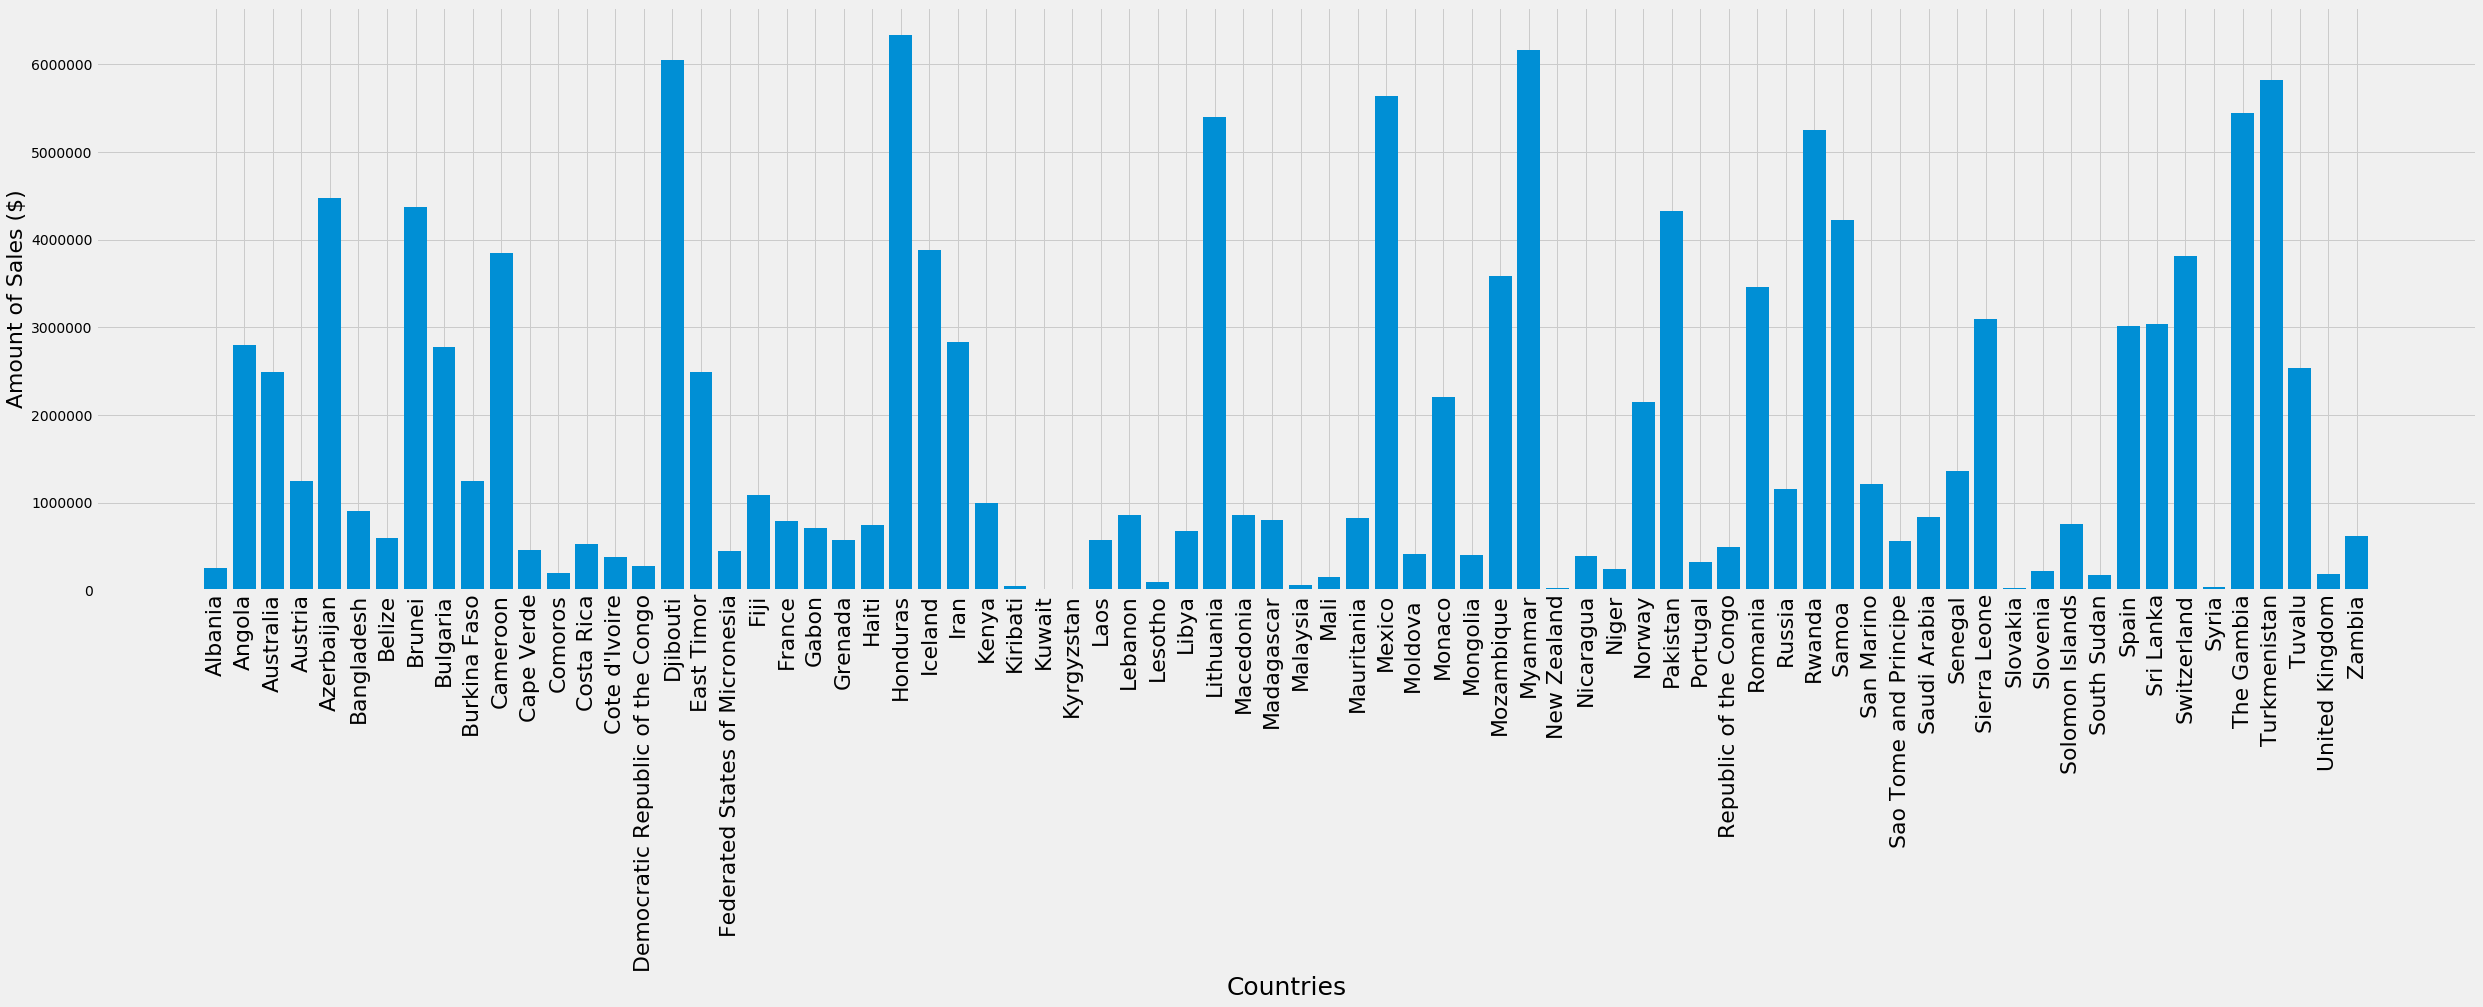

In [20]:
#appears to be Houndarus.. lets plot

keys = [country for country, df in sales.groupby(['Country'])]
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(38,10))
plt.bar(keys, sales.groupby(['Country']).sum()['Sale'])
plt.xticks(keys, rotation='vertical', size=22)
plt.ylabel('Amount of Sales ($)', size=22)
plt.xlabel('Countries',size=25)
plt.show()

In [21]:
#Find month with most sales

sales_month = sales.loc[:, ['Months', 'Sale']]
sales_month.head()

,Months,Sale
0,5,2533654.00
1,8,576782.80
2,5,1158502.59
3,6,75591.66
4,2,3296425.02


In [22]:
sales_month.groupby(['Months']).sum()

,Sale
Months,
1,10482467.12
2,24740517.77
3,2274823.87
4,16187186.33
5,13215739.99
6,5230325.77
7,15669518.50
8,1128164.91
9,5314762.56


In [23]:
#Checking the month with max sales

In [24]:
#opt 1--- shows the max amount geneated 
sales_month.groupby(['Months']).sum().max()

Sale    24740517.77
dtype: float64

In [25]:
#opt 2
sales_month.loc[sales_month.Sale.idxmax()]

Months          2.00
Sale      5997054.98
Name: 13, dtype: float64

range(1, 13)


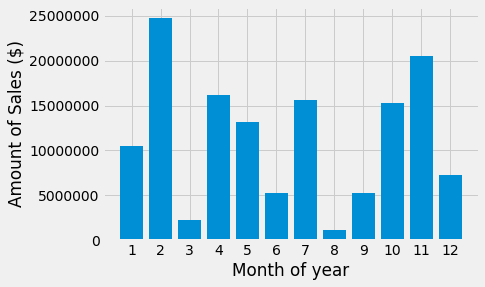

In [26]:
months = range(1,13)
print(months)

plt.style.use("fivethirtyeight")
plt.bar(months, sales_month.groupby(['Months']).sum()['Sale'])
plt.xticks(months)
plt.ylabel('Amount of Sales ($)')
plt.xlabel('Month of year')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.show()

In [27]:
#Most sold items

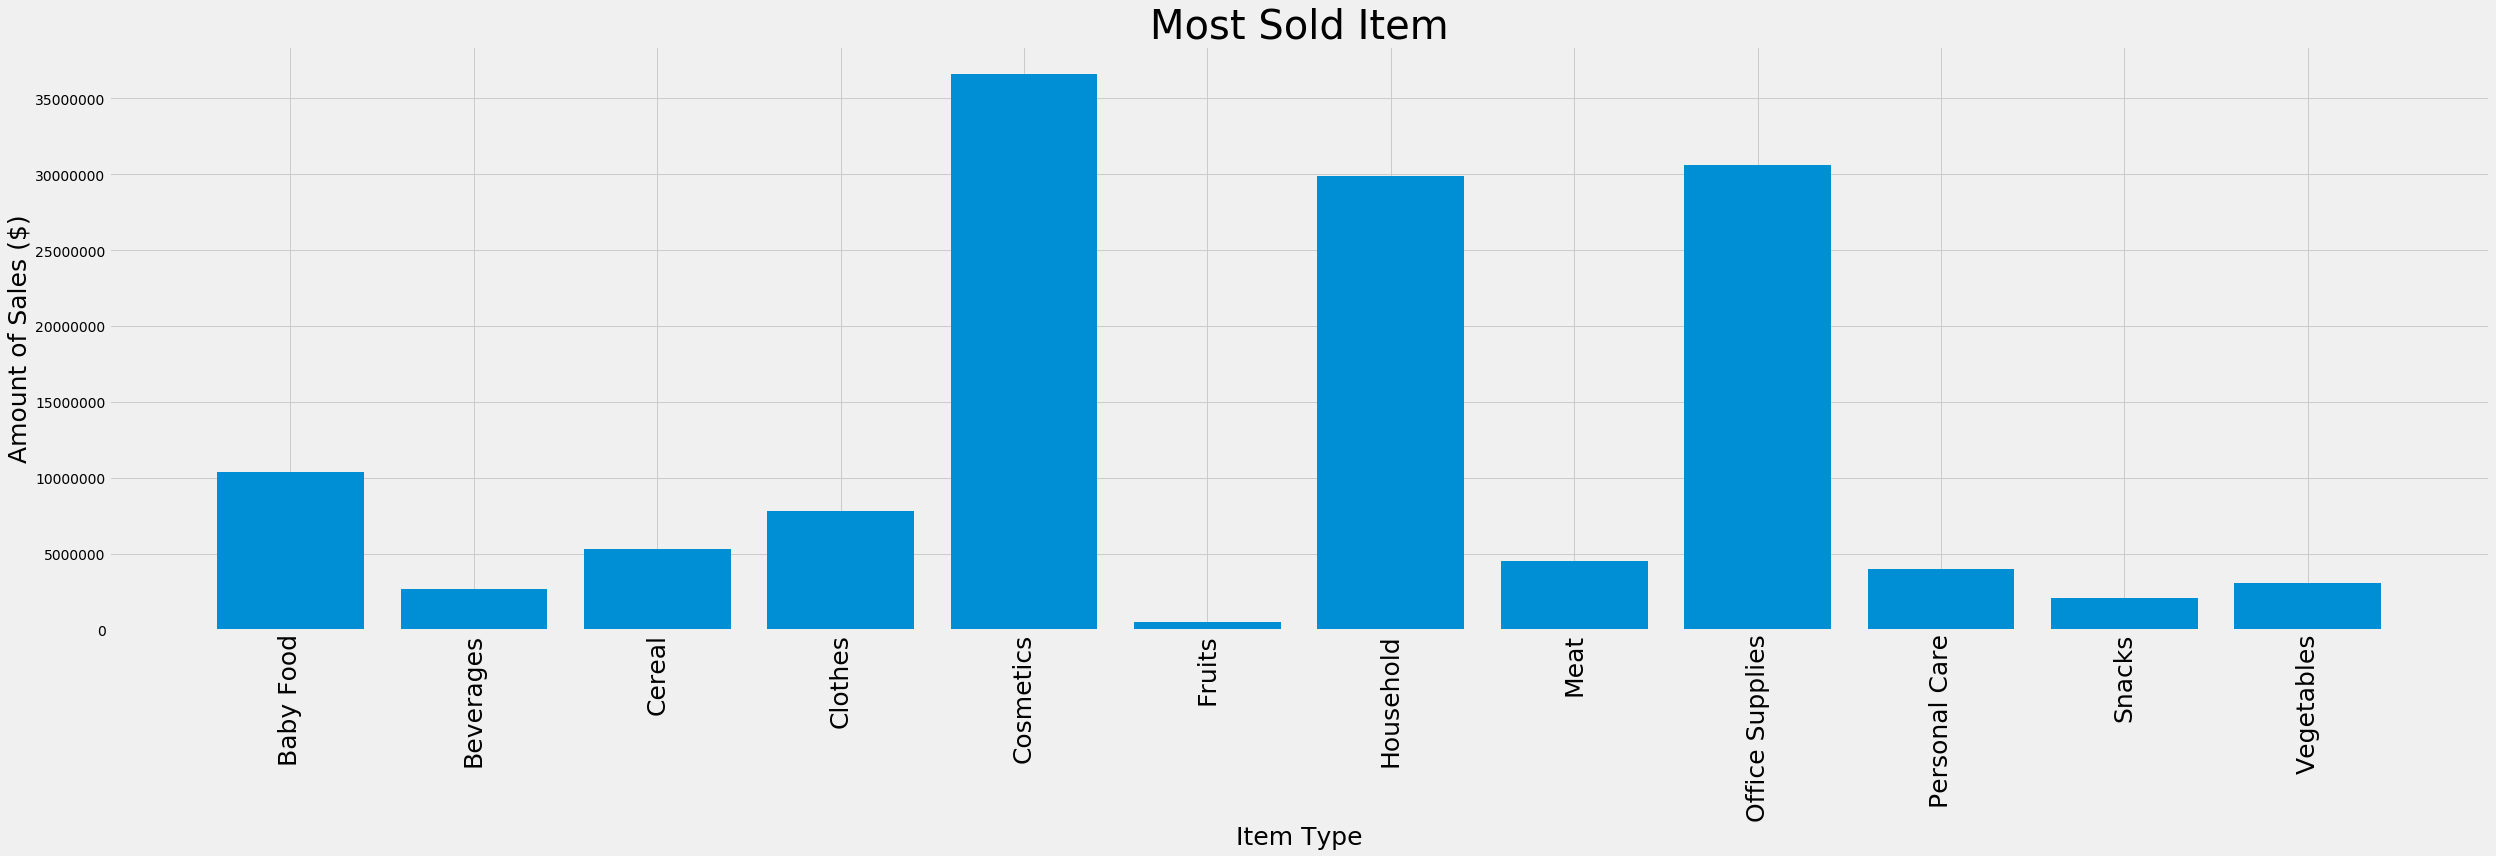

In [28]:
keys = [item for item, df in sales.groupby(['Item_Type'])] 
plt.style.use("fivethirtyeight") #fig style
fig = plt.figure(figsize=(38,10)) #fig size
plt.bar(keys,sales.groupby(['Item_Type']).sum()['Sale'])
plt.xticks(keys, rotation='vertical', size=25)
plt.ylabel('Amount of Sales ($)', size=25)
plt.xlabel('Item Type',size=25)
plt.title('Most Sold Item', size=40)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

In [29]:
#comfirm that comestics sold most

by_item = sales.groupby(['Item_Type']).sum()
by_item

,Order_ID,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit,Unit Cost,Total Profit,Total Cost,Unit Price,Units Sold,Total Revenue,Months,Sale
Item_Type,,,,,,,,,,,,,,,
Baby Food,4649561463,40545,1786.96,1115.94,10350327.60,6463683.90,3886643.70,1115.94,3886643.70,6463683.90,1786.96,40545,10350327.60,32,10350327.60
Beverages,3488436455,56708,379.60,254.32,2690794.60,1802747.32,888047.28,254.32,888047.28,1802747.32,379.60,56708,2690794.60,46,2690794.60
Cereal,5327696855,25877,1439.90,819.77,5322898.90,3030455.47,2292443.43,819.77,2292443.43,3030455.47,1439.90,25877,5322898.90,35,5322898.90
Clothes,7557276802,71260,1420.64,465.92,7787292.80,2553958.40,5233334.40,465.92,5233334.40,2553958.40,1420.64,71260,7787292.80,85,7787292.80
Cosmetics,6463416606,83718,5683.60,3423.29,36601509.60,22045460.94,14556048.66,3423.29,14556048.66,22045460.94,5683.60,83718,36601509.60,101,36601509.60
Fruits,5419570846,49998,93.30,69.20,466481.34,345986.16,120495.18,69.20,120495.18,345986.16,93.30,49998,466481.34,81,466481.34
Household,4984468632,44727,6014.43,4522.86,29889712.29,22477106.58,7412605.71,4522.86,7412605.71,22477106.58,6014.43,44727,29889712.29,48,29889712.29
Meat,1147372316,10675,843.78,729.38,4503675.75,3893065.75,610610.00,729.38,610610.00,3893065.75,843.78,10675,4503675.75,8,4503675.75
Office Supplies,4256053154,46967,7814.52,6299.52,30585380.07,24655796.32,5929583.75,6299.52,5929583.75,24655796.32,7814.52,46967,30585380.07,78,30585380.07


In [30]:
by_item.loc[by_item.Sale.idxmax()]

Order_ID         6.463417e+09
Units_Sold       8.371800e+04
Unit_Price       5.683600e+03
Unit_Cost        3.423290e+03
Total_Revenue    3.660151e+07
Total_Cost       2.204546e+07
Total_Profit     1.455605e+07
Unit Cost        3.423290e+03
Total Profit     1.455605e+07
Total Cost       2.204546e+07
Unit Price       5.683600e+03
Units Sold       8.371800e+04
Total Revenue    3.660151e+07
Months           1.010000e+02
Sale             3.660151e+07
Name: Cosmetics, dtype: float64

In [31]:
Revenue = sales.loc[:, ['Months', 'Total_Revenue', 'Units_Sold']]
Revenue.head()

,Months,Total_Revenue,Units_Sold
0,5,2533654.00,9925
1,8,576782.80,2804
2,5,1158502.59,1779
3,6,75591.66,8102
4,2,3296425.02,5062


In [32]:
Revcheck = Revenue.groupby(['Months']).sum()
Revcheck

,Total_Revenue,Units_Sold
Months,,
1,10482467.12,35742
2,24740517.77,71079
3,2274823.87,14497
4,16187186.33,44680
5,13215739.99,63651
6,5230325.77,34893
7,15669518.50,76201
8,1128164.91,17251
9,5314762.56,30101


In [33]:
#see the months with most generated revenue
Revcheck.loc[Revcheck.Total_Revenue.idxmax()]


Total_Revenue    24740517.77
Units_Sold          71079.00
Name: 2, dtype: float64

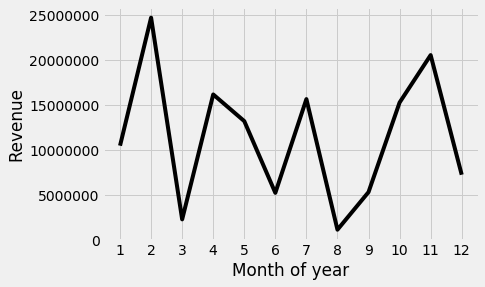

In [34]:
months = [1,2,3,4,5,6,7,8,9,10,11,12]
b = Revcheck['Total_Revenue']
plt.plot(months, b, color='black')
plt.style.use("ggplot")
plt.xticks(months)
plt.ylabel('Revenue')
plt.xlabel('Month of year')
plt.grid(True)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

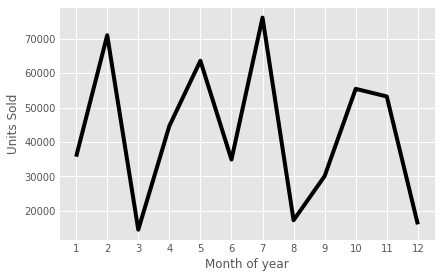

In [35]:
months = range(1,13)
plt.plot(months, Revenue.groupby(['Months']).sum()['Units_Sold'], color='black')
plt.style.use("ggplot")
plt.xticks(months)
plt.ylabel('Units Sold')
plt.xlabel('Month of year')
plt.grid(True)
plt.show()

In [36]:
#Month with max unit sold
Revcheck.loc[Revcheck.Units_Sold.idxmax()]

Total_Revenue    15669518.5
Units_Sold          76201.0
Name: 7, dtype: float64